<a href="https://colab.research.google.com/github/nahidularafat/Data-analysis-with-python-numpy-pandas-/blob/main/3%2Cweatherhistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

# Import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/weatherHistory.csv')


# Drop unnecessary columns


In [ ]:
drop_cols = ['Formatted Date', 'Loud Cover', 'Precip Type', 'Daily Summary']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')


# Handle missing values


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


# Group similar weather summaries to reduce label noise


In [ ]:
def simplify_summary(summary):
    summary = summary.lower()
    if 'cloudy' in summary:
        return 'cloudy'
    elif 'clear' in summary:
        return 'clear'
    elif 'rain' in summary:
        return 'rain'
    elif 'fog' in summary:
        return 'foggy'
    elif 'drizzle' in summary:
        return 'drizzle'
    elif 'snow' in summary:
        return 'snow'
    else:
        return 'other'

df['Simple_Summary'] = df['Summary'].apply(simplify_summary)


# Label encode target


In [ ]:
le = LabelEncoder()
df['Summary_encoded'] = le.fit_transform(df['Simple_Summary'])


# Drop the original summary columns


In [ ]:
df.drop(columns=['Summary', 'Simple_Summary'], inplace=True)


# Drop classes with fewer than 50 samples


In [ ]:
class_counts = df['Summary_encoded'].value_counts()
valid_classes = class_counts[class_counts >= 50].index
df_filtered = df[df['Summary_encoded'].isin(valid_classes)]


# Feature engineering


In [ ]:
df_filtered.loc[:, 'ApparentTempDiff'] = df_filtered['Apparent Temperature (C)'] - df_filtered['Temperature (C)']
df_filtered.loc[:, 'Humidity*Pressure'] = df_filtered['Humidity'] * df_filtered['Pressure (millibars)']


# PyCaret Classification


In [ ]:
from pycaret.classification import *

clf = setup(data=df_filtered,
            target='Summary_encoded',
            session_id=123,
            fix_imbalance=True,
            fix_imbalance_method='smote',
            verbose=False)


# Compare models and get the best one


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7201,0.8411,0.7201,0.7290,0.7238,0.5042,0.5050,25.8040
rf,Random Forest Classifier,0.7125,0.8430,0.7125,0.7326,0.7202,0.5021,0.5048,95.1850
catboost,CatBoost Classifier,0.6948,0.8266,0.6948,0.7170,0.7035,0.4722,0.4748,141.4520
xgboost,Extreme Gradient Boosting,0.6847,0.8247,0.6847,0.7168,0.6963,0.4651,0.4699,11.4310
lightgbm,Light Gradient Boosting Machine,0.6810,0.8242,0.6810,0.7153,0.6934,0.4604,0.4656,23.8480
gbc,Gradient Boosting Classifier,0.6469,0.0000,0.6469,0.7078,0.6670,0.4256,0.4360,384.7580
dt,Decision Tree Classifier,0.6369,0.6989,0.6369,0.6816,0.6532,0.3939,0.4001,4.4490
nb,Naive Bayes,0.5581,0.7571,0.5581,0.6783,0.5897,0.2915,0.3045,0.6090
qda,Quadratic Discriminant Analysis,0.5504,0.0000,0.5504,0.6745,0.5572,0.2900,0.3189,0.6470
knn,K Neighbors Classifier,0.5332,0.7264,0.5332,0.6462,0.5619,0.2962,0.3159,2.2830


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# Tune the best model


In [ ]:
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6813,0.6384,0.6813,0.5850,0.5997,0.3149,0.3564
1,0.6825,0.6378,0.6825,0.5843,0.5886,0.3046,0.3562
2,0.6823,0.6392,0.6823,0.5912,0.5886,0.3045,0.3566
3,0.6837,0.6392,0.6837,0.5891,0.5889,0.3074,0.3594
4,0.6851,0.6355,0.6851,0.5816,0.5901,0.3038,0.3591
5,0.6826,0.6368,0.6826,0.5776,0.5879,0.3032,0.3552
6,0.6883,0.6396,0.6883,0.6001,0.5914,0.3144,0.3703
7,0.6859,0.6412,0.6859,0.5970,0.6032,0.3226,0.3671
8,0.6831,0.6409,0.6831,0.5933,0.6033,0.3219,0.3623


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Evaluate tuned_model directly:


In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict on the same data


In [ ]:
predictions = predict_model(tuned_model, data=df_filtered)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9175,0.9859,0.9175,0.9182,0.9178,0.8509,0.8509


In [ ]:
df_sampled = df_filtered.sample(frac=0.3, random_state=123)


# Performance metrics


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = df_filtered['Summary_encoded']
y_pred = predictions['prediction_label']

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(" Performance Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


 Performance Metrics:
Accuracy: 0.9175
Precision: 0.9182
Recall: 0.9175
F1 Score: 0.9178


# Confusion Matrix


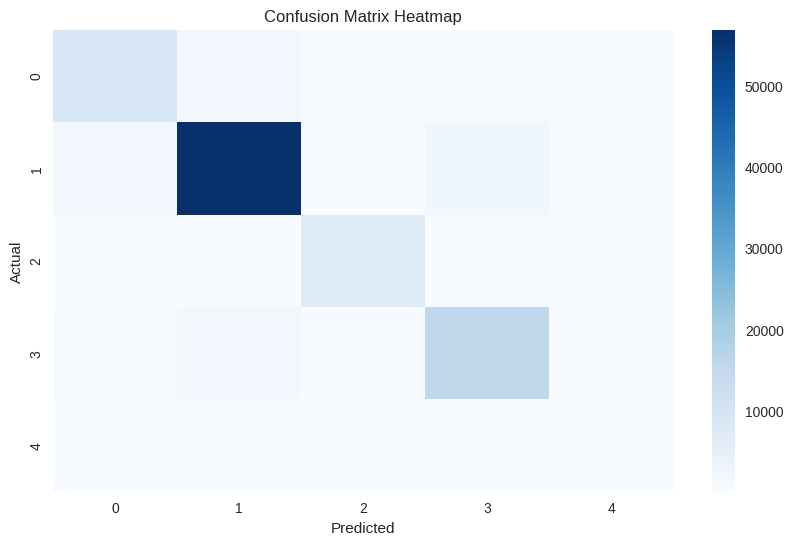

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import json

# Replace with your actual notebook filename
notebook_path = "your_notebook.ipynb"

with open(notebook_path, "r", encoding="utf-8") as f:
    nb = json.load(f)

# Clean broken widget metadata
for cell in nb.get("cells", []):
    metadata = cell.get("metadata", {})
    widgets = metadata.get("widgets", {})
    if isinstance(widgets, dict) and "state" not in widgets:
        del metadata["widgets"]

with open(notebook_path, "w", encoding="utf-8") as f:
    json.dump(nb, f, indent=2)


FileNotFoundError: [Errno 2] No such file or directory: 'your_notebook.ipynb'